Show results of simulations

In [5]:
import pandas as pd
f_path ='../data/random/result.csv' # Random P_r
f_path_2 ='../data/concate/result.csv' # Concatenated P_c
df = pd.read_csv(f_path)
df = df.T
df = df[1:]
df_2 = pd.read_csv(f_path_2)
df_2 = df_2.T
df_2 = df_2[1:]

Finished!


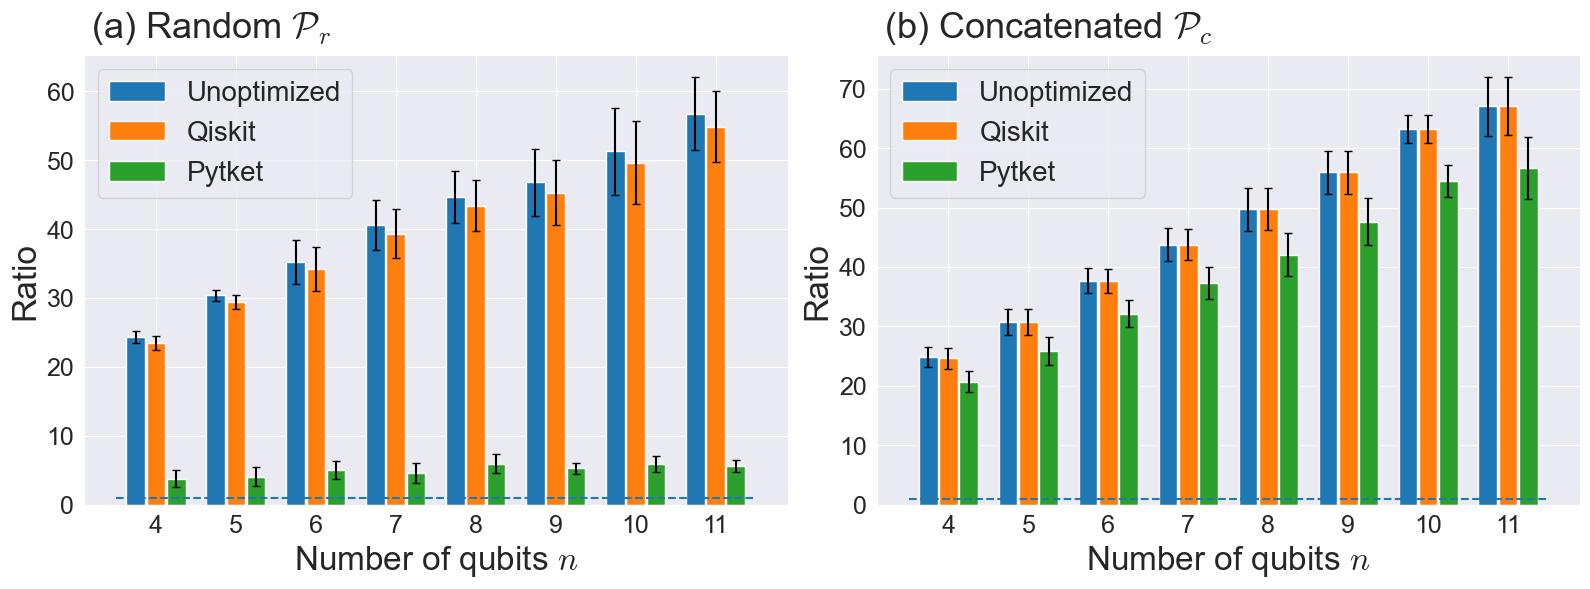

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
import math
err_unopt = [math.sqrt(i) for i in df.iloc[:,6].to_list()]
err_qis = [math.sqrt(i) for i in df.iloc[:,5].to_list()]
err_tk = [math.sqrt(i) for i in df.iloc[:,7].to_list()]
err_unopt_2 = [math.sqrt(i) for i in df_2.iloc[:,6].to_list()]
err_qis_2 = [math.sqrt(i) for i in df_2.iloc[:,5].to_list()]
err_tk_2 = [math.sqrt(i) for i in df_2.iloc[:,7].to_list()]

x = [int(i) for i in range(4,12)]

fonts1 = ["Times New Roman","Arial","Times New Roman"]
fonts2 = ["stix","stixsans","cm"]
for font1,font2 in zip(fonts1,fonts2):
    # plt.rcParams["font.family"] = font1
    plt.rcParams["mathtext.fontset"] = font2


fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

axis_font_size = 24

ax1.set_xlabel(r"Number of qubits $n$",fontsize=axis_font_size)  # x axis
ax1.set_ylabel('Ratio',fontsize=axis_font_size)  # y axis
ax2.set_xlabel(r"Number of qubits $n$",fontsize=axis_font_size)  # x axis
ax2.set_ylabel('Ratio',fontsize=axis_font_size)  # y axis

# bar graph
n=3
group_gap = 0.3
bar_gap = 0.02
width = (1 - group_gap)/n
shift = width + bar_gap
cap=3

ax1.bar([m - shift for m in x], df.iloc[:,2],yerr=err_unopt,capsize=cap,width=width, label="Unoptimized")
ax1.bar(x, df.iloc[:,1],yerr=err_qis,capsize=cap,width=width, label="Qiskit")
ax1.bar([m + shift for m in x], df.iloc[:,3],yerr=err_tk,capsize=cap,width=width, label="Pytket")
ax2.bar([m - shift for m in x], df_2.iloc[:,2],yerr=err_unopt_2,capsize=cap,width=width, label="Unoptimized")
ax2.bar(x, df_2.iloc[:,1],yerr=err_qis_2,capsize=cap,width=width, label="Qiskit")
ax2.bar([m + shift for m in x], df_2.iloc[:,3],yerr=err_tk_2,capsize=cap,width=width, label="Pytket")

#######
ax1.set_yticks([10*i for i in range(7)])
ax2.set_yticks([10*i for i in range(8)])

#ratio=1
ax1.plot([min(x)-0.5, max(x)+0.5],[1, 1], linestyle='dashed')
ax2.plot([min(x)-0.5, max(x)+0.5],[1, 1], linestyle='dashed')

location_x = 0.01
location_y = 1.04
ax1.text(location_x, location_y, r"(a) Random $\mathcal{P}_r$", size=26, transform=ax1.transAxes)
ax2.text(location_x, location_y, r"(b) Concatenated $\mathcal{P}_c$", size=26, transform=ax2.transAxes)

label_size = 18
ax1.tick_params(axis="x",labelsize=label_size)
ax1.tick_params(axis="y",labelsize=label_size)
ax2.tick_params(axis="x",labelsize=label_size)
ax2.tick_params(axis="y",labelsize=label_size)


ax1.legend(fontsize=20)
ax2.legend(fontsize=20)
fig.tight_layout()

print('Finished!')
plt.show()

Plot the relationship between $r^{(3)}_{\mathrm{unopt}}$ and $r_{\mathrm{opt}}$  (Pytket).

In [7]:
f_path_3 ='../data/random/result_unopt_level.csv' # Random
df_3 = pd.read_csv(f_path_3)
f_path_4 ='../data/concate/result_unopt_level.csv' # Concatenated
df_4 = pd.read_csv(f_path_4)

Finished!


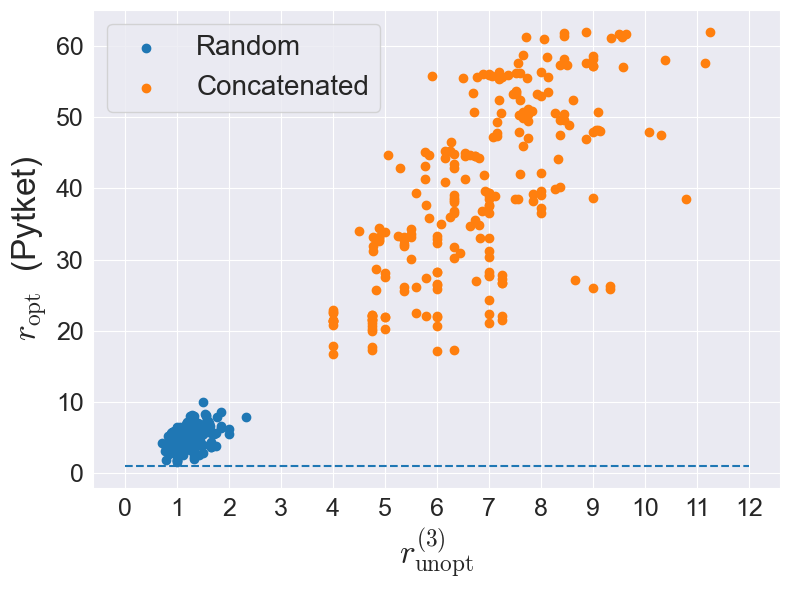

In [8]:
import matplotlib.pyplot as plt
import datetime

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1, 1, 1)

ax.set_xlabel(r'$r^{(3)}_{\mathrm{unopt}}$',fontsize=axis_font_size)  # x axis
ax.set_ylabel('$r_{\mathrm{opt}}$  (Pytket)',fontsize=axis_font_size)  # y axis

x = df_3.iloc[:,1]
ax.scatter(x, df_3.iloc[:,2], label="Random")

x = df_4.iloc[:,1]
ax.scatter(x, df_4.iloc[:,2], label="Concatenated")

ax.plot([0,12],[1, 1], linestyle='dashed')

plt.gca().yaxis.set_major_formatter(plt.FormatStrFormatter('%.0f'))
plt.gca().xaxis.set_major_formatter(plt.FormatStrFormatter('%.0f'))
plt.xticks([i for i in range(13)])
plt.yticks([10*i for i in range(7)])

plt.gca().yaxis.set_tick_params(labelsize=label_size)
plt.gca().xaxis.set_tick_params(labelsize=label_size)

plt.legend(fontsize=20)
fig.tight_layout()

print('Finished!')
plt.show()